In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from IPython.display import FileLink
import shutil

In [124]:
#Membaca file csv
file_path = 'D:\Tugas Akhir\Stroke\healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)
# Menampilkan jumlah data awal dataset sebelum diubah
jumlah_data_awal = df.shape[0]
print("Jumlah data awal sebelum perubahan:", jumlah_data_awal)
df = df.drop('id', axis=1)
df.head()

Jumlah data awal sebelum perubahan: 5110


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [125]:
# Menghapus baris dengan nilai 'other' pada kolom 'age'
df = df[df['gender'] != 'Other']

# Menghapus baris dengan nilai 'children' atau 'Never_worked' pada kolom 'work_type'
df = df[~df['work_type'].isin(['children', 'Never_worked'])]

# Menghapus baris dengan nilai bmi lebih dari 60 dan usia kurang dari 25
df = df[(df['bmi'] <= 60) & (df['age'] >= 25)]
#halo

In [126]:
print("Jumlah data unik sebelum perubahan:")
print(df['work_type'].value_counts())

Jumlah data unik sebelum perubahan:
work_type
Private          2341
Self-employed     750
Govt_job          598
Name: count, dtype: int64


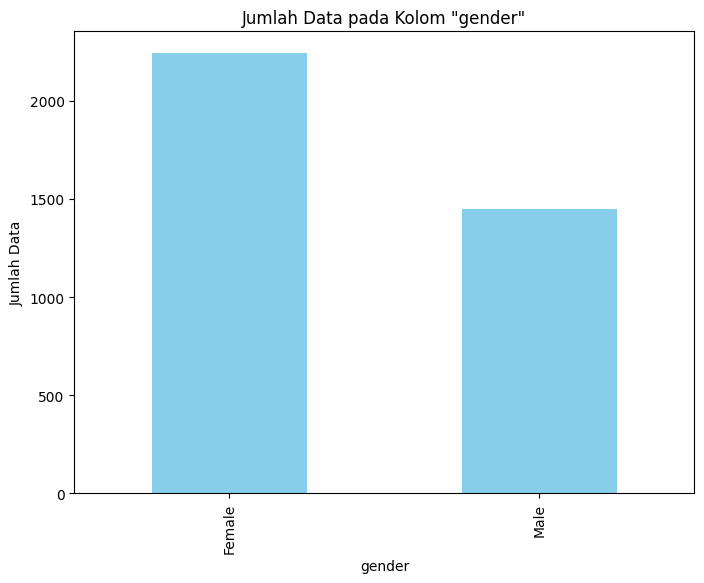

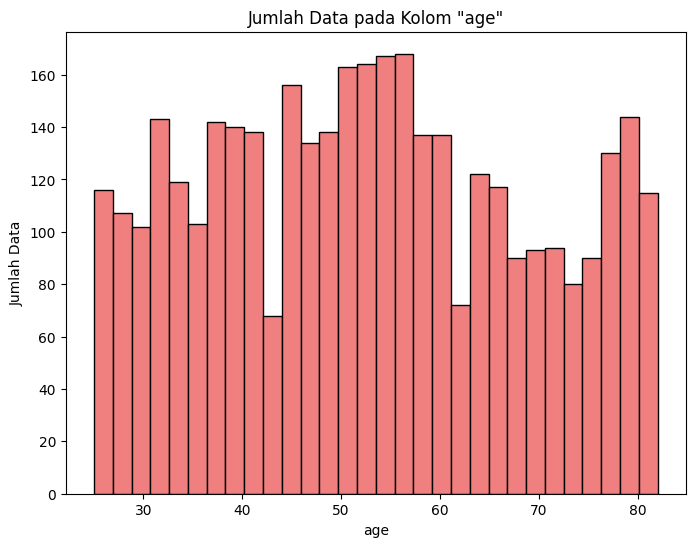

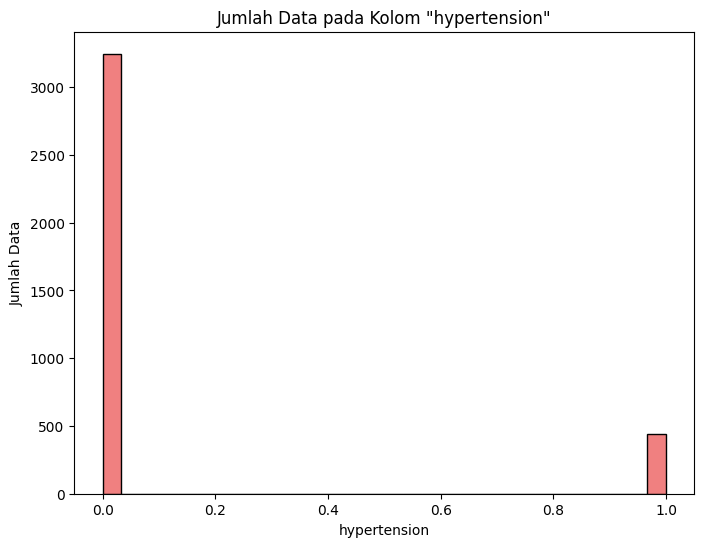

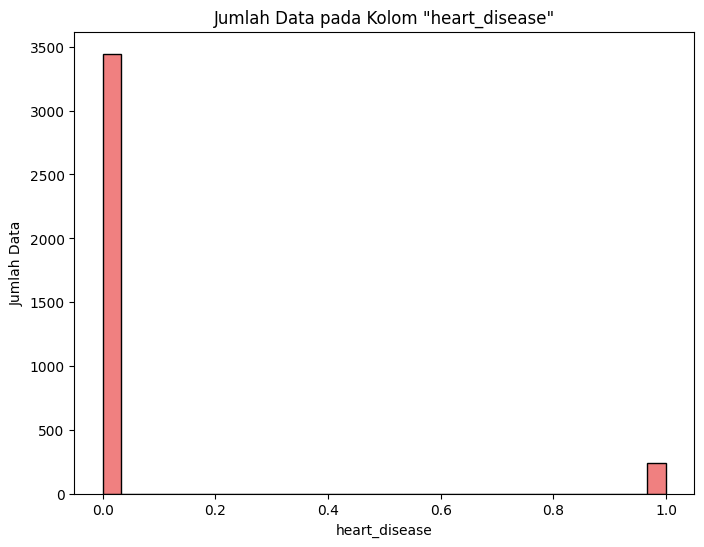

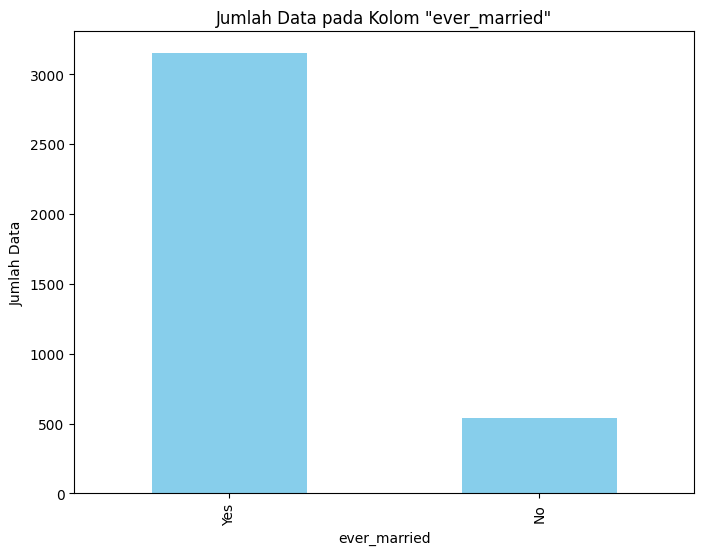

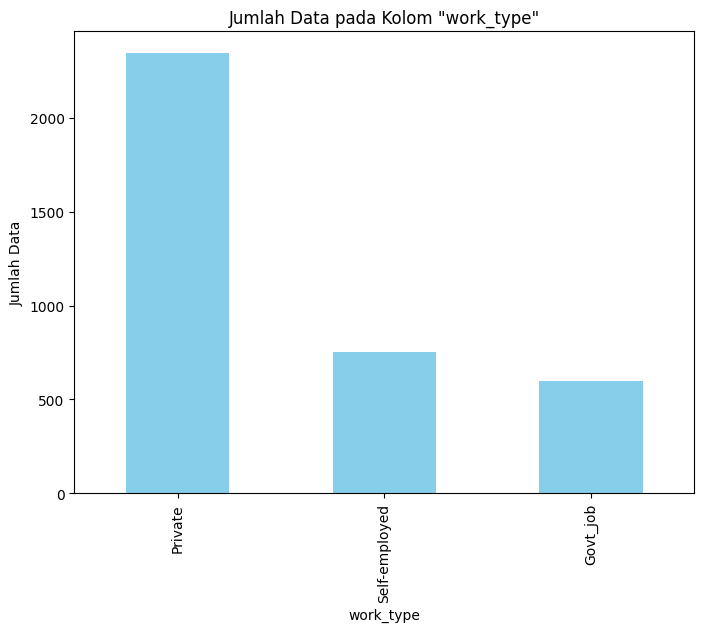

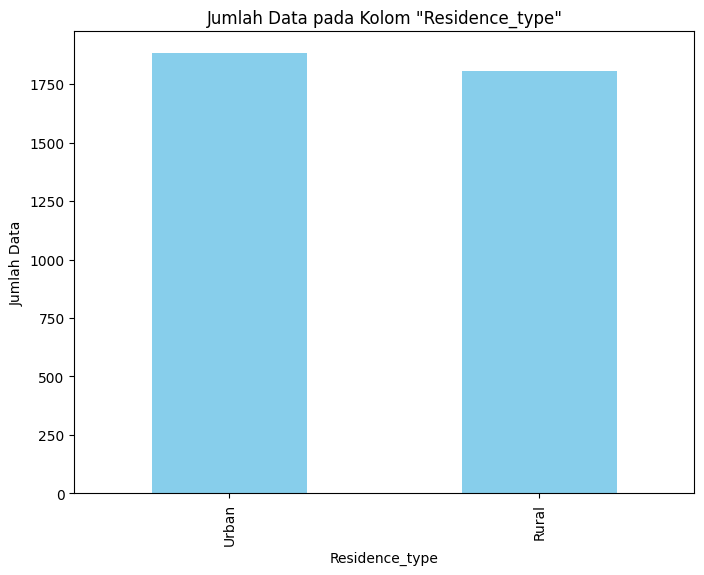

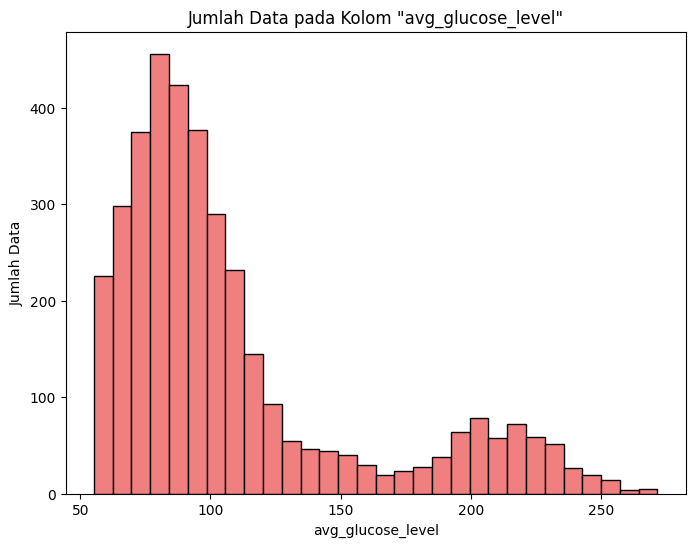

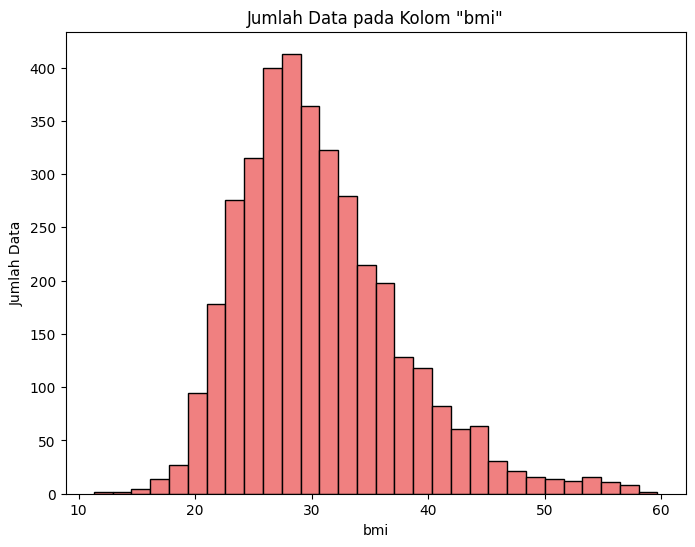

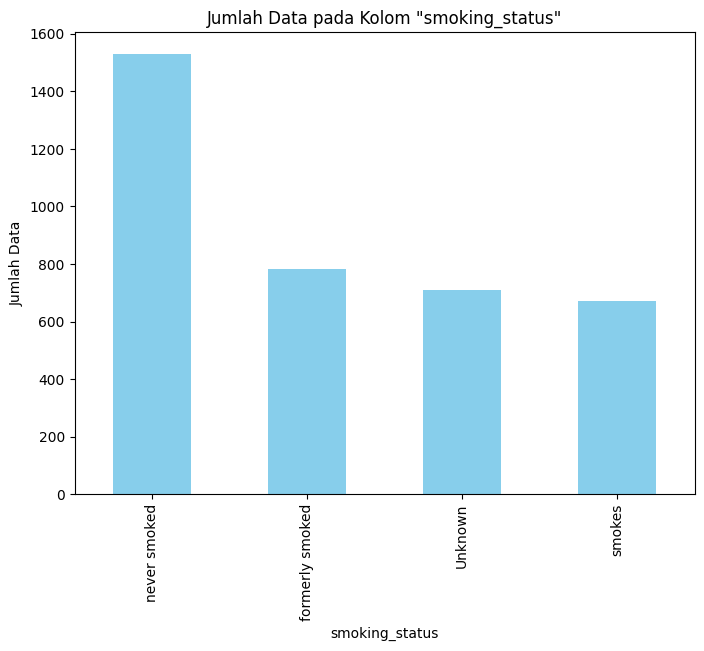

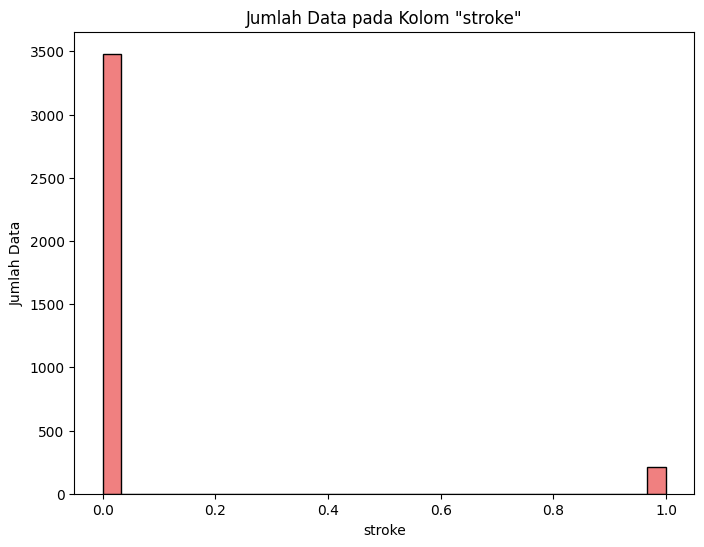

In [127]:
# Memilih kolom-kolom yang ingin diplot
selected_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                     'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

# Menampilkan diagram batang untuk setiap kolom yang dipilih
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    
    if df[column].dtype == 'object':
        df[column].value_counts().plot(kind='bar', color='skyblue')
    else:
        plt.hist(df[column], bins=30, color='lightcoral', edgecolor='black')

    plt.title(f'Jumlah Data pada Kolom "{column}"')
    plt.xlabel(column)
    plt.ylabel('Jumlah Data')

    plt.show()

In [128]:
print(df['gender'].value_counts())
# Mengganti label 'male' menjadi 0 dan 'female' menjadi 1 pada kolom 'gender'
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
print(df.head())

gender
Female    2242
Male      1447
Name: count, dtype: int64

Data setelah perubahan:
   gender   age  hypertension  heart_disease ever_married      work_type  \
0       0  67.0             0              1          Yes        Private   
2       0  80.0             0              1          Yes        Private   
3       1  49.0             0              0          Yes        Private   
4       1  79.0             1              0          Yes  Self-employed   
5       0  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly smoked       1  


In [129]:
print(df['ever_married'].value_counts())
# Mengganti label 'Yes' menjadi 1 dan 'No' menjadi 0 pada kolom 'ever_married'
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
print(df.head())

ever_married
Yes    3148
No      541
Name: count, dtype: int64

Data setelah perubahan:
   gender   age  hypertension  heart_disease  ever_married      work_type  \
0       0  67.0             0              1             1        Private   
2       0  80.0             0              1             1        Private   
3       1  49.0             0              0             1        Private   
4       1  79.0             1              0             1  Self-employed   
5       0  81.0             0              0             1        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly smoked       1  


In [130]:
print(df['Residence_type'].value_counts())
# Mengganti label 'Urban' dan 'Rural' menjadi 1 dan 2 pada kolom 'Residence_type'
df['Residence_type'] = df['Residence_type'].replace({'Urban': 1, 'Rural': 2})

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
print(df.head())

Residence_type
Urban    1881
Rural    1808
Name: count, dtype: int64

Data setelah perubahan:
   gender   age  hypertension  heart_disease  ever_married      work_type  \
0       0  67.0             0              1             1        Private   
2       0  80.0             0              1             1        Private   
3       1  49.0             0              0             1        Private   
4       1  79.0             1              0             1  Self-employed   
5       0  81.0             0              0             1        Private   

   Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0               1             228.69  36.6  formerly smoked       1  
2               2             105.92  32.5     never smoked       1  
3               1             171.23  34.4           smokes       1  
4               2             174.12  24.0     never smoked       1  
5               1             186.21  29.0  formerly smoked       1  


In [131]:
# Contoh data awal
data = {'work_type': ['Private', 'Self-employed', 'Govt_job']}
df = pd.DataFrame(data)

# Menampilkan jumlah data unik sebelum perubahan
print("Jumlah data unik sebelum perubahan:")
print(df['work_type'].value_counts())

# Melakukan one-hot encoding pada kolom 'work_type'
df_encoded = pd.get_dummies(df, columns=['work_type'], prefix='work_type')

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
print(df_encoded.head())

# Simpan hasil one-hot encoding ke dalam variabel df
df = pd.concat([df, df_encoded], axis=1)

# Simpan hasil one-hot encoding ke dalam file CSV
df_encoded.to_csv('work_type_dataset.csv', index=False)

# Pindahkan file ke direktori yang diinginkan menggunakan shutil
shutil.move('work_type_dataset.csv', 'D:/Tugas Akhir/Stroke/work_type_dataset.csv')

# Menampilkan DataFrame setelah one-hot encoding
print("\nDataFrame setelah one-hot encoding:")
print(df)

Jumlah data unik sebelum perubahan:
work_type
Private          1
Self-employed    1
Govt_job         1
Name: count, dtype: int64

Data setelah perubahan:
   work_type_Govt_job  work_type_Private  work_type_Self-employed
0               False               True                    False
1               False              False                     True
2                True              False                    False

DataFrame setelah one-hot encoding:
       work_type  work_type_Govt_job  work_type_Private  \
0        Private               False               True   
1  Self-employed               False              False   
2       Govt_job                True              False   

   work_type_Self-employed  
0                    False  
1                     True  
2                    False  


In [136]:
# # Contoh data awal
# data = {'work_type': ['Private', 'Self-employed', 'Govt_job']}
# df = pd.DataFrame(data)

# # Menampilkan jumlah data unik sebelum perubahan
# print("Jumlah data unik sebelum perubahan:")
# print(df['work_type'].value_counts())

# # Melakukan one-hot encoding pada kolom 'work_type'
# df_encoded = pd.get_dummies(df, columns=['work_type'], prefix='work_type')

# # Menampilkan lima baris pertama dari dataframe setelah perubahan
# print("\nData setelah perubahan:")
# print(df_encoded.head())

# # Simpan hasil one-hot encoding ke dalam variabel df
# df = df_encoded

# # Simpan hasil one-hot encoding ke dalam file CSV
# df_encoded.to_csv('work_type_dataset.csv', index=False)

# # Pindahkan file ke direktori yang diinginkan menggunakan shutil
# shutil.move('work_type_dataset.csv', 'D:/Tugas Akhir/Stroke/work_type_dataset.csv')

# Contoh data awal
data = {'work_type': ['Private', 'Self-employed', 'Govt_job']}
df = pd.DataFrame(data)

# Menampilkan jumlah data unik sebelum perubahan
print("Jumlah data unik sebelum perubahan:")
print(df['work_type'].value_counts())

# Melakukan one-hot encoding pada kolom 'work_type'
df_encoded = pd.get_dummies(df, columns=['work_type'], prefix='work_type')

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
print(df_encoded.head())

# Simpan hasil one-hot encoding ke dalam variabel df
df = df_encoded

# Menampilkan beberapa baris pertama dari dataframe setelah perubahan
print("\nBeberapa baris pertama dari dataframe setelah perubahan:")
print(df.head())




Jumlah data unik sebelum perubahan:
work_type
Private          1
Self-employed    1
Govt_job         1
Name: count, dtype: int64

Data setelah perubahan:
   work_type_Govt_job  work_type_Private  work_type_Self-employed
0               False               True                    False
1               False              False                     True
2                True              False                    False

Beberapa baris pertama dari dataframe setelah perubahan:
   work_type_Govt_job  work_type_Private  work_type_Self-employed
0               False               True                    False
1               False              False                     True
2                True              False                    False


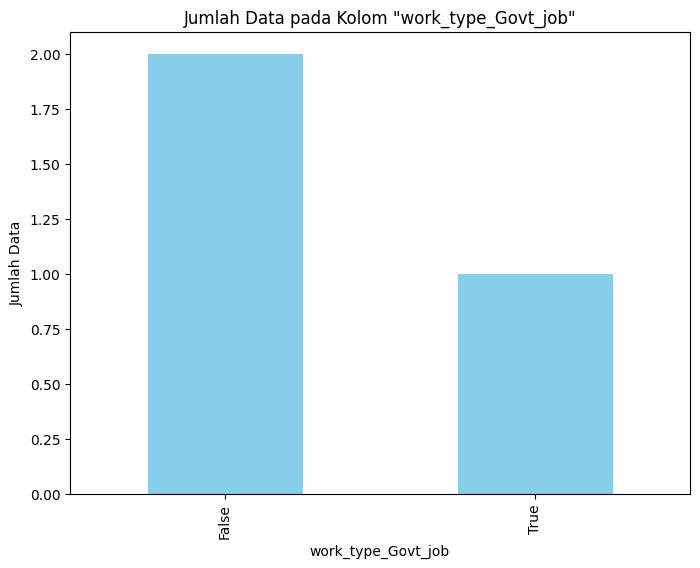

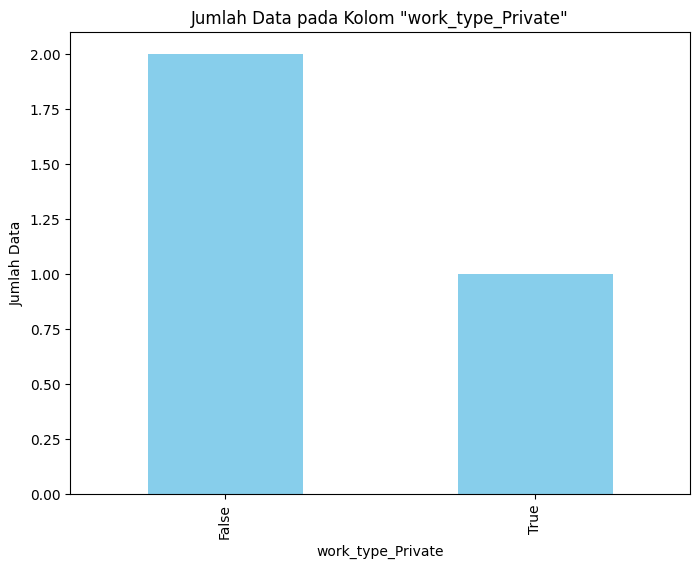

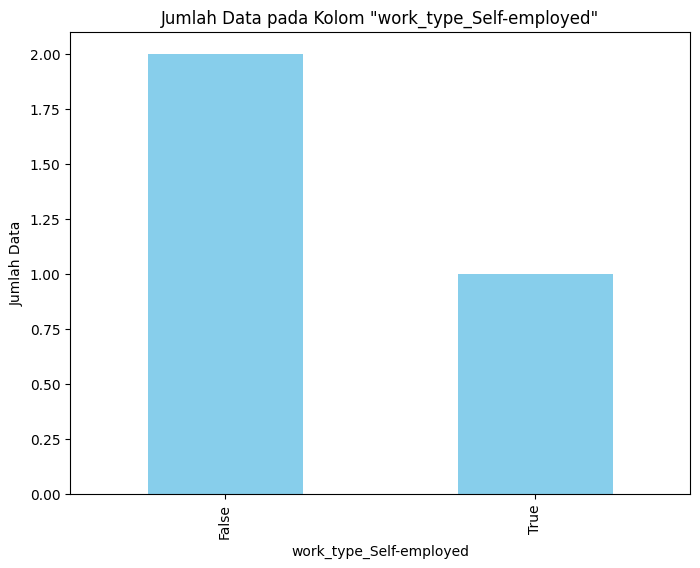

Daftar Kolom di DataFrame:
Index(['work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed'], dtype='object')


In [98]:
# Memilih kolom-kolom yang ingin diplot
selected_columns = ['work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed']

# Menampilkan diagram batang untuk setiap kolom yang dipilih
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    
    df[column].value_counts().plot(kind='bar', color='skyblue')

    plt.title(f'Jumlah Data pada Kolom "{column}"')
    plt.xlabel(column)
    plt.ylabel('Jumlah Data')

    plt.show()

# Menampilkan daftar kolom di DataFrame
print("Daftar Kolom di DataFrame:")
print(df.columns)

In [100]:
# Contoh data awal
data = {'smoking_status': ['smokes', 'formerly smoked', 'never smoked', 'Unknown']}
df = pd.DataFrame(data)

# Menampilkan jumlah data unik sebelum perubahan
print("Jumlah data unik sebelum perubahan:")
print(df['smoking_status'].value_counts())


# Melakukan one-hot encoding pada kolom 'smoking_status'
df_encoded = pd.get_dummies(df, columns=['smoking_status'], prefix='smoking_status')

# Menampilkan lima baris pertama dari dataframe setelah perubahan
print("\nData setelah perubahan:")
print(df_encoded.head())

# Simpan hasil one-hot encoding ke dalam variabel df
df = df_encoded

Jumlah data unik sebelum perubahan:
smoking_status
smokes             1
formerly smoked    1
never smoked       1
Unknown            1
Name: count, dtype: int64

Data setelah perubahan:
   smoking_status_Unknown  smoking_status_formerly smoked  \
0                   False                           False   
1                   False                            True   
2                   False                           False   
3                    True                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                        False                   True  
1                        False                  False  
2                         True                  False  
3                        False                  False  


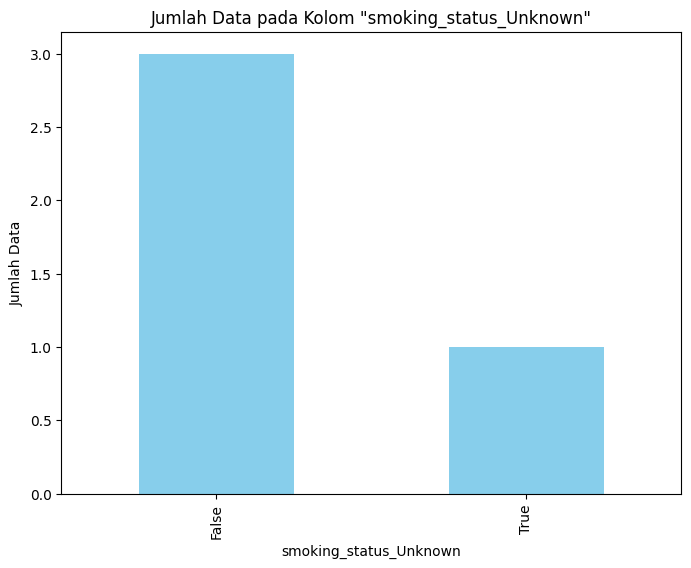

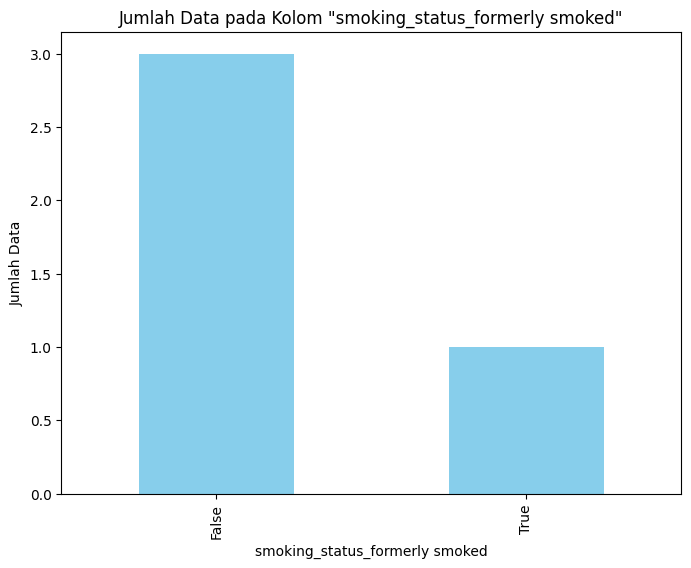

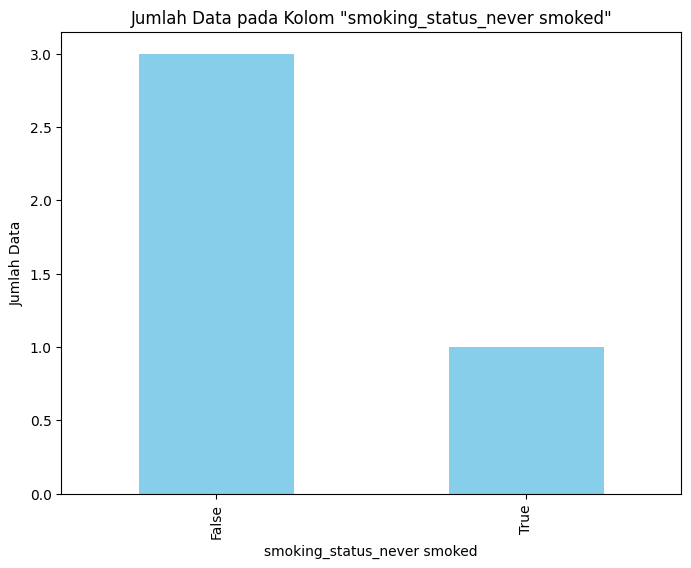

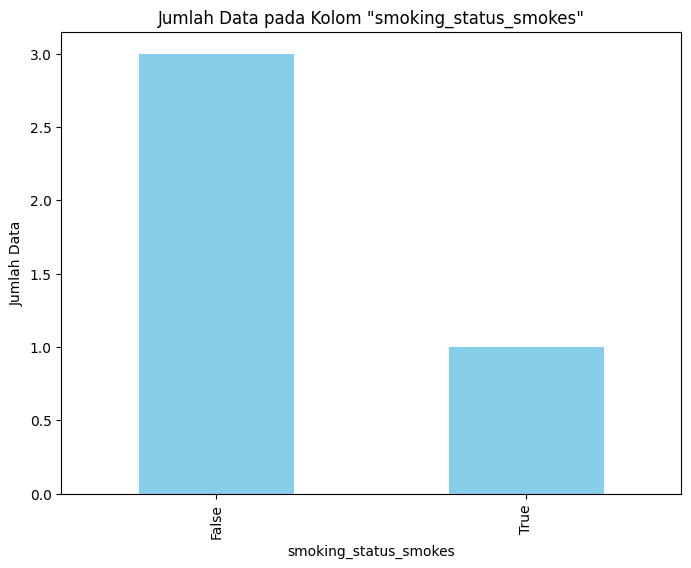

Daftar Kolom di DataFrame:
Index(['smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


In [101]:
# Memilih kolom-kolom yang ingin diplot
selected_columns = ['smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']

# Menampilkan diagram batang untuk setiap kolom yang dipilih
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    
    df_encoded[column].value_counts().plot(kind='bar', color='skyblue')

    plt.title(f'Jumlah Data pada Kolom "{column}"')
    plt.xlabel(column)
    plt.ylabel('Jumlah Data')

    plt.show()

# Menampilkan daftar kolom di DataFrame
print("Daftar Kolom di DataFrame:")
print(df.columns)


In [102]:
print("Daftar Kolom di DataFrame:")
print(df.head())

Daftar Kolom di DataFrame:
   smoking_status_Unknown  smoking_status_formerly smoked  \
0                   False                           False   
1                   False                            True   
2                   False                           False   
3                    True                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                        False                   True  
1                        False                  False  
2                         True                  False  
3                        False                  False  


In [68]:
print("\nTipe Data Kolom:")
print(df.dtypes)


Tipe Data Kolom:
smoking_status    object
dtype: object


<Axes: >

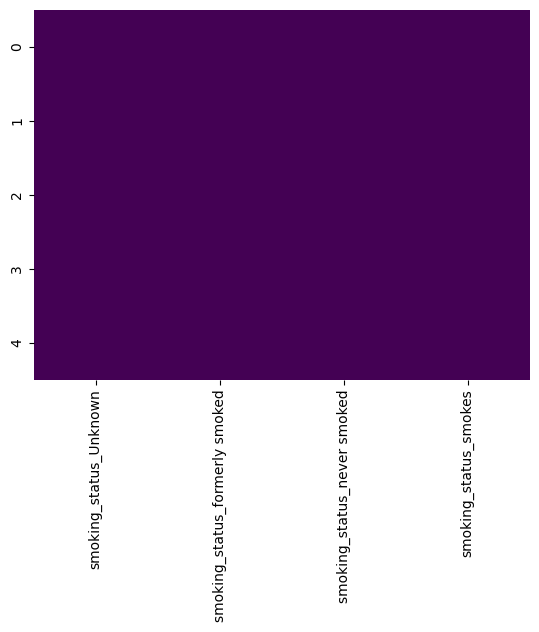

In [80]:
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [100]:
# Menghitung total nilai yang hilang pada setiap kolom
missing_values_per_column = df.isna().sum()

# Menampilkan total nilai yang hilang pada dataset
total_missing_values = missing_values_per_column.sum()

# Menampilkan total nilai yang hilang dan kolom-kolom yang memiliki nilai yang hilang
print("Total nilai yang hilang pada dataset:", total_missing_values)

# Menampilkan kolom-kolom yang memiliki nilai yang hilang
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]
print("\nKolom-kolom yang memiliki nilai yang hilang:")
print(columns_with_missing_values)


Total nilai yang hilang pada dataset: 0

Kolom-kolom yang memiliki nilai yang hilang:
Series([], dtype: int64)


In [74]:
import shutil

# Simpan DataFrame ke dalam file CSV
df.to_csv('dataset_preprocessed1.csv', index=False, decimal=',')


# Pindahkan file ke direktori yang diinginkan
shutil.move('dataset_preprocessed1.csv', 'D:\Tugas Akhir\Stroke\dataset_preprocessed1.csv')

'D:\\Tugas Akhir\\Stroke\\dataset_preprocessed1.csv'